## NYT Web Scraper 

In [128]:
import requests
import re 
from bs4 import BeautifulSoup 
import pandas as pd 
import numpy as np 


data = {} 
listofstates = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

URL = "https://www.nytimes.com/interactive/2020/us/states-reopen-map-coronavirus.html"

page = requests.get(URL) 

soup = BeautifulSoup(page.content, 'html.parser')

mydivs = soup.findAll("div", {"class": "g-inner-box"})


statelist = [] 
reopenedplaceslist = [] 
orderexpirationlist = []
reopenedboollist = [] 
industrylist = []


for div in mydivs: 
    state = div.find("div", {"data-state" : re.compile(r".*")})['data-state']
    
    statelist.append(state)
    
    try: 
        reopenedbool = div.find("div", {"class": 'g-details-subhed'}).text
    except: 
        reopenedbool = 'Not Reopened'
    

    boolean = False 
    divlist = div.find_all("div", {"class": "g-cat-name"})
    if(len(divlist)!= 0): 
        for i in range(len(divlist)): 
            if (divlist[i].text == "Industries"):
                boolean = True 
                industrylist.append(divlist[i].find_next_sibling("div").text)
            if(i == (len(divlist)-1) and boolean == False):
                industrylist.append("No Industry")
    else: 
        industrylist.append("No Industry")

    
    
    reopenedboollist.append(reopenedbool)
    
    #grab list of reopened places 
    reopenedplaces = div.find_all("div", {"class": 'g-cat-name'})

    #change list of reopenedplaces to text 
    for i in range(len(reopenedplaces)):
        reopenedplaces[i] = reopenedplaces[i].text
    
    reopenedplaceslist.append(reopenedplaces)

    
    orderexpiration = div.find("span", {"class": 'g-date-details-text'}).text
    if (orderexpiration.split()[0] == "expired"): 
        orderexpiration = orderexpiration.split()[2] + " " + orderexpiration.split()[3]
        orderexpiration = orderexpiration.replace(".", "")
        
    elif(orderexpiration.split()[0] == "struck" or orderexpiration.split()[0] == "in"): 
        orderexpiration = orderexpiration.split()[3] + " " + orderexpiration.split()[4]
        orderexpiration = orderexpiration.replace(".", "")
    
    orderexpirationlist.append(orderexpiration)
        

    
    
df = pd.DataFrame() 
df['State'] = statelist
df['Reopened'] = reopenedbool

df['Reopened Places Overview'] = reopenedplaceslist
df['Order Expiration'] = orderexpirationlist    

df['Outdoor and recreation'] = 0 
df['Retail'] = 0
df['Food and drink'] = 0  
df['Personal care'] = 0 
df['Entertainment'] = 0 
df['Industries'] = 0 
df['Houses of worship'] = 0 
df["Total Count"] = 0  

df['Industries_List'] = industrylist

# industrylist = ["Manufacturing", "Warehouses", "Offices", "Movie, TV and music production", "distribution", "construction"] 
df["Manufacturing"] = 0 
df["Warehouses"] = 0 
df["Offices"] = 0 
df["Movie, TV and music production"] = 0
df["Distribution"] = 0
df["Construction"] = 0
df["Malls"] = 0
df["Hotels"] = 0

for index, row in df.iterrows():
    templist = row["Industries_List"]
    templist = templist.lower()
    if "manufacturing" in templist:  
        df.iloc[index, df.columns.get_loc("Manufacturing")] = 1 
    if "warehouses" in templist: 
        df.iloc[index, df.columns.get_loc("Warehouses")] = 1 
    if "offices" in templist: 
        df.iloc[index, df.columns.get_loc("Offices")] = 1 
    if "movie, tv and music production" in templist: 
        df.iloc[index, df.columns.get_loc("Movie, TV and music production")] = 1 
    if "distribution" in templist: 
        df.iloc[index, df.columns.get_loc("Distribution")] = 1
    if "construction" in templist: 
        df.iloc[index, df.columns.get_loc("Construction")] = 1 
    if "malls" in templist: 
        df.iloc[index, df.columns.get_loc("Malls")] = 1 
    if "hotels" in templist: 
        df.iloc[index, df.columns.get_loc("Hotels")] = 1 
        

## PLEASE NOTE: MARYLAND IS AN EXCEPTION. do not have as granular as wanted. reopening soon is not its own section

for index, row in df.iterrows():
    templist = row["Reopened Places Overview"]
    if "Outdoor and recreation" in templist: 
        df.iloc[index, df.columns.get_loc("Outdoor and recreation")] = 1 

    if "Retail" in templist: 
        df.iloc[index, df.columns.get_loc("Retail")] = 1 
    
    if "Food and drink" in templist: 
        df.iloc[index, df.columns.get_loc("Food and drink")] = 1 

    if "Personal care" in templist: 
        df.iloc[index, df.columns.get_loc("Personal care")] = 1 
    if "Entertainment" in templist: 
        df.iloc[index, df.columns.get_loc("Entertainment")] = 1
    if "Industries" in templist: 
        df.iloc[index, df.columns.get_loc("Industries")] = 1 
    if "Houses of worship" in templist: 
        df.iloc[index, df.columns.get_loc("Houses of worship")] = 1  

    


#adhoc counting list
indexinglist = [4,5,6,7,8,9]

for i in range(len(df.index)):
    for j in indexinglist: 
        if(df.iat[i,j] == 1): 
            df.iat[i,11] += 1
import datetime

year = str(datetime.datetime.today().year) 
month = str(datetime.datetime.today().month) 
day = str(datetime.datetime.today().day) 



In [130]:
df

,State,Reopened,Reopened Places Overview,Order Expiration,Outdoor and recreation,Retail,Food and drink,Personal care,Entertainment,Industries,...,Total Count,Industries_List,Manufacturing,Warehouses,Offices,"Movie, TV and music production",Distribution,Construction,Malls,Hotels
0,Alabama,Reopened,"[Outdoor and recreation, Retail, Food and drin...",April 30,1,1,1,1,1,0,...,5,No Industry,0,0,0,0,0,0,0,0
1,Alaska,Reopened,"[Food and drink, Retail, Personal care, Outdoo...",April 24,1,1,1,1,1,0,...,5,No Industry,0,0,0,0,0,0,0,0
2,Arizona,Reopened,"[Retail, Personal care, Food and drink, Outdoo...",May 15,1,1,1,1,1,0,...,5,No Industry,0,0,0,0,0,0,0,0
3,Arkansas,Reopened,"[Outdoor and recreation, Personal care, Food a...",Did not have a statewide stay-at-home order.,1,0,1,1,1,0,...,4,No Industry,0,0,0,0,0,0,0,0
4,California,Reopened,"[Industries, Personal care, Food and drink, Ho...",March 19,1,1,1,1,1,1,...,6,"Manufacturing; Warehouses; Offices; Movie, TV ...",1,1,1,1,0,0,0,0
5,Colorado,Reopened,"[Personal care, Retail, Industries, Outdoor an...",April 26,1,1,1,1,1,1,...,6,Offices; Manufacturing,1,0,1,0,0,0,0,0
6,Connecticut,Reopened,"[Retail, Personal care, Entertainment, Industr...",May 20,1,1,1,1,1,1,...,6,Offices,0,0,1,0,0,0,0,0
7,Delaware,Reopened,"[Food and drink, Outdoor and recreation, Retai...",May 31,1,1,1,1,1,0,...,5,No Industry,0,0,0,0,0,0,0,0
8,District of Columbia,Reopened,"[Outdoor and recreation, Personal care, Entert...",May 29,1,1,1,1,1,0,...,5,No Industry,0,0,0,0,0,0,0,0
9,Florida,Reopened,"[Outdoor and recreation, Houses of worship, En...",May 4,1,1,1,1,1,0,...,5,No Industry,0,0,0,0,0,0,0,0


### Political Party/ Abbreviation Append

In [131]:
pdata = pd.read_csv("politicalparty.csv", header = None) 
# Preview the first 5 lines of the loaded data 
for i in range(len(pdata.index)):
    pdata.iat[i,0] = pdata.iat[i,0].replace("Governor of", "").strip() 

left = pd.DataFrame() 
left = pd.merge(left=df, right=pdata, how='left', left_on='State', right_on=0)
left = left.drop(columns = [0,3])
abbrevdata = pd.read_csv("abbrev.csv", header = None)
left = left.rename(columns={1: 'Governor', 2: 'Party'})
left = pd.merge(left=left, right=abbrevdata, how='left', left_on='State', right_on=0)
left = left.drop(columns = [0,1])
left = left.rename(columns={2: 'Abbreviation'})


df = left 
df

,State,Reopened,Reopened Places Overview,Order Expiration,Outdoor and recreation,Retail,Food and drink,Personal care,Entertainment,Industries,...,Warehouses,Offices,"Movie, TV and music production",Distribution,Construction,Malls,Hotels,Governor,Party,Abbreviation
0,Alabama,Reopened,"[Outdoor and recreation, Retail, Food and drin...",April 30,1,1,1,1,1,0,...,0,0,0,0,0,0,0,Kay Ivey,Republican,AL
1,Alaska,Reopened,"[Food and drink, Retail, Personal care, Outdoo...",April 24,1,1,1,1,1,0,...,0,0,0,0,0,0,0,Mike Dunleavy,Republican,AK
2,Arizona,Reopened,"[Retail, Personal care, Food and drink, Outdoo...",May 15,1,1,1,1,1,0,...,0,0,0,0,0,0,0,Doug Ducey,Republican,AZ
3,Arkansas,Reopened,"[Outdoor and recreation, Personal care, Food a...",Did not have a statewide stay-at-home order.,1,0,1,1,1,0,...,0,0,0,0,0,0,0,Asa Hutchinson,Republican,AR
4,California,Reopened,"[Industries, Personal care, Food and drink, Ho...",March 19,1,1,1,1,1,1,...,1,1,1,0,0,0,0,Gavin Newsom,Democratic,CA
5,Colorado,Reopened,"[Personal care, Retail, Industries, Outdoor an...",April 26,1,1,1,1,1,1,...,0,1,0,0,0,0,0,Jared Polis,Democratic,CO
6,Connecticut,Reopened,"[Retail, Personal care, Entertainment, Industr...",May 20,1,1,1,1,1,1,...,0,1,0,0,0,0,0,Ned Lamont,Democratic,CT
7,Delaware,Reopened,"[Food and drink, Outdoor and recreation, Retai...",May 31,1,1,1,1,1,0,...,0,0,0,0,0,0,0,John C. Carney Jr.,Democratic,DE
8,District of Columbia,Reopened,"[Outdoor and recreation, Personal care, Entert...",May 29,1,1,1,1,1,0,...,0,0,0,0,0,0,0,NaN,NaN,DC
9,Florida,Reopened,"[Outdoor and recreation, Houses of worship, En...",May 4,1,1,1,1,1,0,...,0,0,0,0,0,0,0,Ron DeSantis,Republican,FL


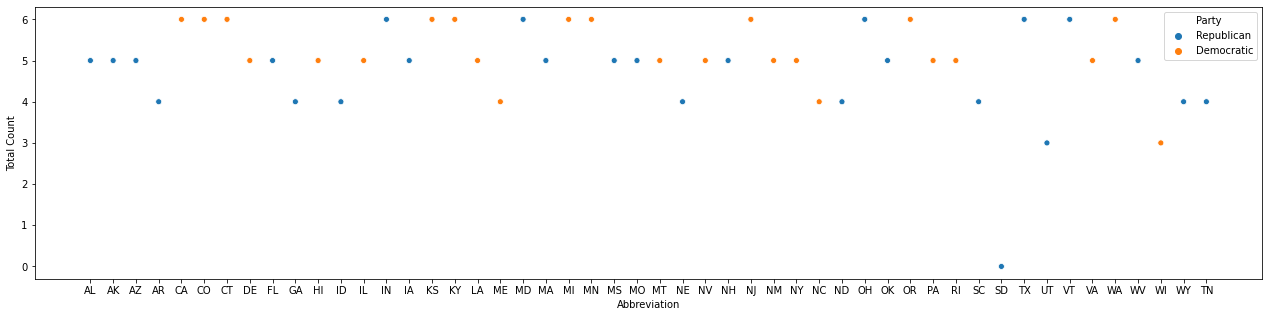

In [132]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline 
a4_dims = (22,5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax = ax, x="Abbreviation", y="Total Count", hue = "Party", data=df)

plt.savefig('polpartyvstotalcount.pdf')



In [133]:
#this data needs to be refreshed every month. API was too convoluted to spend time to understand how to wrangle. 
unemployment_data = pd.read_csv("unemployment.csv") 
unemployment_data = unemployment_data[["NAME","PctUnemployed_CurrentMonth","PctUnemployed_02Month", "PctUnemployed_03Month"]]
unemployment_data = unemployment_data.rename(columns={"PctUnemployed_CurrentMonth": 'June_Unemployment', 'PctUnemployed_02Month': 'April_Unemployment', 'PctUnemployed_03Month': "March_Unemployment", "NAME": 'State'})
df = pd.merge(left=df, right=unemployment_data, how='left', left_on='State', right_on='State')

df 


,State,Reopened,Reopened Places Overview,Order Expiration,Outdoor and recreation,Retail,Food and drink,Personal care,Entertainment,Industries,...,Distribution,Construction,Malls,Hotels,Governor,Party,Abbreviation,June_Unemployment,April_Unemployment,March_Unemployment
0,Alabama,Reopened,"[Outdoor and recreation, Retail, Food and drin...",April 30,1,1,1,1,1,0,...,0,0,0,0,Kay Ivey,Republican,AL,13.2,2.9,3.2
1,Alaska,Reopened,"[Food and drink, Retail, Personal care, Outdoo...",April 24,1,1,1,1,1,0,...,0,0,0,0,Mike Dunleavy,Republican,AK,13.7,5.9,6.6
2,Arizona,Reopened,"[Retail, Personal care, Food and drink, Outdoo...",May 15,1,1,1,1,1,0,...,0,0,0,0,Doug Ducey,Republican,AZ,13.1,4.4,4.6
3,Arkansas,Reopened,"[Outdoor and recreation, Personal care, Food a...",Did not have a statewide stay-at-home order.,1,0,1,1,1,0,...,0,0,0,0,Asa Hutchinson,Republican,AR,10.3,3.9,4.1
4,California,Reopened,"[Industries, Personal care, Food and drink, Ho...",March 19,1,1,1,1,1,1,...,0,0,0,0,Gavin Newsom,Democratic,CA,16.2,4.3,4.3
5,Colorado,Reopened,"[Personal care, Retail, Industries, Outdoor an...",April 26,1,1,1,1,1,1,...,0,0,0,0,Jared Polis,Democratic,CO,12.2,2.9,2.8
6,Connecticut,Reopened,"[Retail, Personal care, Entertainment, Industr...",May 20,1,1,1,1,1,1,...,0,0,0,0,Ned Lamont,Democratic,CT,8.0,4.4,4.4
7,Delaware,Reopened,"[Food and drink, Outdoor and recreation, Retai...",May 31,1,1,1,1,1,0,...,0,0,0,0,John C. Carney Jr.,Democratic,DE,14.8,4.0,4.2
8,District of Columbia,Reopened,"[Outdoor and recreation, Personal care, Entert...",May 29,1,1,1,1,1,0,...,0,0,0,0,NaN,NaN,DC,11.1,5.2,5.1
9,Florida,Reopened,"[Outdoor and recreation, Houses of worship, En...",May 4,1,1,1,1,1,0,...,0,0,0,0,Ron DeSantis,Republican,FL,13.5,2.8,3.0


In [134]:
df.to_csv('SMB States Reopening NY Times Article ' + year + "." + month + "." + day + '.csv')


# Sandbox

In [111]:

#grab list of reopened places 
# testing = div.find_all("div", {"class": 'g-cat-name'})

# #change list of reopenedplaces to text 
# for i in range(len(reopenedplaces)):
# #     reopenedplaces[i] = reopenedplaces[i].text

testlist = []
for div in mydivs: 
    boolean = False 
    divlist = div.find_all("div", {"class": "g-cat-name"})
    if(len(divlist)!= 0): 
        for i in range(len(divlist)): 
            if (divlist[i].text == "Industries"):
                boolean = True 
                testlist.append(divlist[i].find_next_sibling("div").text)
            if(i == (len(divlist)-1) and boolean == False):
                testlist.append("No Industry")
    else: 
        testlist.append("No Industry")

testlist

testlist







['No Industry',
 'No Industry',
 'No Industry',
 'No Industry',
 'Manufacturing; Warehouses; Offices; Movie, TV and music production',
 'Offices; Manufacturing',
 'Offices',
 'No Industry',
 'No Industry',
 'No Industry',
 'No Industry',
 'Construction in some areas; Offices in some areas',
 'No Industry',
 'Manufacturing; Offices',
 'Manufacturing, offices',
 'No Industry',
 'Offices',
 'Manufacturing, construction, offices',
 'No Industry',
 'No Industry',
 'Manufacturing; Construction, offices',
 'Construction, manufacturing; Offices; Hotels, lodging',
 'Construction, real estate; Manufacturing, including auto companies; Offices',
 'Manufacturing; Offices',
 'No Industry',
 'No Industry',
 'No Industry',
 'No Industry',
 'No Industry',
 'No Industry',
 'Construction',
 'Offices at 25 percent capacity',
 'Construction, manufacturing; Offices',
 'No Industry',
 'No Industry',
 'Manufacturing, distribution, construction; Offices',
 'Offices',
 'Offices in most counties',
 'No Industry'